In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..")

In [2]:
import analysis as an
from utils import config, io, models
from analysis import selector as se

In [3]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

this will be in the select code, data adapting for the multicountry analysis

In [4]:
from analysis import reader as re

In [5]:
from analysis import selectorall as sall

In [6]:
from analysis import countrylist as clist

In [7]:
ncorr=50

In [8]:
indicators=sall.selection(ncorr)

KeyboardInterrupt: 

In [9]:
indicators

IndicatorCode
SI.SPR.PCAP.ZG              1.000000
NextYearGDP                 1.000000
SI.SPR.PC40.ZG              1.000000
SI.SPR.PC40.05              0.720355
SI.SPR.PCAP.05              0.714283
LP.LPI.LOGS.XQ              0.403281
LP.LPI.TRAC.XQ              0.402993
LP.LPI.CUST.XQ              0.392186
LP.LPI.INFR.XQ              0.387387
LP.LPI.OVRL.XQ              0.384166
per_allsp.ben_q1_tot        0.363735
FB.POS.TOTL.P5              0.347135
per_si_allsi.ben_q1_tot     0.339280
NY.GNP.MKTP.KD.ZG           0.332176
LP.LPI.ITRN.XQ              0.318228
LP.LPI.TIME.XQ              0.315624
CM.MKT.INDX.ZG              0.314947
NY.GDP.MKTP.KD.ZG           0.313394
SL.TLF.0714.WK.FE.TM        0.313309
SL.TLF.0714.WK.MA.ZS        0.307164
SL.TLF.0714.SW.MA.ZS        0.307164
NY.GNP.PCAP.KD.ZG           0.304058
SI.SPR.PC40                 0.290013
SL.TLF.0714.SW.FE.ZS        0.288936
SL.TLF.0714.WK.FE.ZS        0.288936
IC.FRM.FEMM.ZS              0.288655
NY.GDP.PCAP.KD.ZG       

In [9]:
predictors,pre2010=sall.indicators(ncorr)
#indicators=pd.DataFrame(indicators)
#indexs=indicators.index.values.tolist()
predictors=np.nan_to_num(predictors)

Todo esto de arriba llama a funciones selectall para obtener la información del dataset

In [11]:
predictors

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  5.98439075,  0.        , ...,  0.        ,
        -3.13756141,  0.        ],
       [ 0.        , 11.37592123,  0.        , ...,  0.        ,
        31.87712627,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.09645039,  0.        ]])

In [10]:
pre2010=pre2010.fillna(0)
npre2010=pre2010.to_numpy()

In [11]:
x=predictors[:,:-1]
y=predictors[:,-1]

x son todos los elementos de predictors menos la ultima columna, la ultima es y que es justamente GDPgrowth para el siguiente año

In [12]:
import time

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

gbm_hyperparams = {
    'n_estimators': 100,
    'max_depth': 10,
    'learning_rate': 0.1,
    'loss': 'ls'
}
gbm_model = GradientBoostingRegressor(**gbm_hyperparams)
t0 = time.time()
gbm_model.fit(X_train, y_train)
print(f"Elapsed time training: {time.time() - t0} seconds")
t0 = time.time()
gbm_y_pred = gbm_model.predict(X_test)
print(f"Elapsed time predicting: {time.time() - t0} seconds")


Elapsed time training: 657.3474788665771 seconds
Elapsed time predicting: 0.19089651107788086 seconds


In [14]:
print(f"RMSE: {mean_squared_error(y_test, gbm_y_pred)**0.5}")
print(f"R^2: {r2_score(y_test, gbm_y_pred)}")

results_df = X_test.copy()
results_df["y_real"] = y_test
results_df["y_pred"] = gbm_y_pred.astype(float)
results_df["err"] = results_df["y_real"] - results_df["y_pred"]
results_df["%_err"] = results_df["err"] / results_df["y_real"] * 100
results_df

RMSE: 5.0247145496067445
R^2: 0.28252989229071857


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [15]:
prediction=gbm_model.predict(npre2010[:,:-1]).astype(float)

In [16]:
prediction

array([-2.07204961e-01,  2.03241513e-01,  6.83136484e-01, -6.47798838e-01,
        1.75552705e-02,  1.28413126e-02,  2.88332329e-01,  3.66692338e-01,
        8.35528653e-01,  1.86446518e-02, -9.06514256e-01, -1.22817614e-01,
       -1.84734668e+00, -1.57398246e-02,  5.16637939e-01, -3.52828267e-01,
        7.84312080e-01, -2.09400300e-02,  1.94238284e-01,  1.90397924e-01,
        1.25355740e-01,  6.88919166e-01,  4.69887827e-01,  5.40397947e-01,
        3.95601658e-01, -1.16161991e+00, -9.58886201e-02, -9.79294926e-01,
        3.62576923e-01,  1.21841338e-01,  8.27184267e-01, -2.46073601e-01,
        1.15372365e+00, -2.12427996e-01,  4.55647732e-02, -1.42507970e-01,
        2.61194138e-02, -2.94432807e-02,  1.59473376e+00,  5.21837955e-01,
        5.85693997e-01,  4.74755979e-01, -7.34771358e-02,  9.20556955e-01,
        5.88358887e-01, -1.91453096e-01, -2.22527305e-01,  4.85050783e-01,
       -7.57585478e-02, -5.32758387e-01,  7.72505737e-01,  6.34298572e-02,
       -5.00947492e-01,  

In [17]:
import pickle

In [18]:
from joblib import dump, load

In [19]:
dump(gbm_model, 'gbmmodel_Fullest.joblib') 

['gbmmodel_Fullest.joblib']

In [20]:
name=input("write something")

write something hola


In [21]:
fullname=name+'.joblib'

In [22]:
fullname

'hola.joblib'

In [26]:
a=gbm_model.feature_importances_

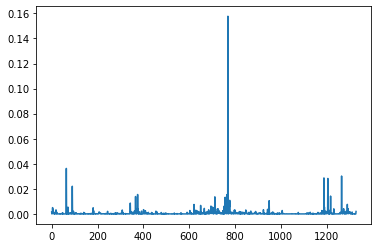

In [27]:
plt.plot(a)
plt.show()

In [31]:
df=pd.DataFrame(a)
df

,0
0,1.440452e-03
1,1.023797e-05
2,3.227629e-05
3,5.027148e-04
4,5.041934e-03
...,...
1324,0.000000e+00
1325,0.000000e+00
1326,4.959973e-09
1327,0.000000e+00


In [38]:
len(df)

1329

In [36]:
best=df[0].nlargest(50)

In [37]:
best.to_csv("bestindicators.csv")